# Stable_Diffusion_GPU_vs_CPU

## Stable Diffusion usando una GPU en Google Colaboratory con CUDA

Basado en [Exploring Stable Diffusion in Google Colab using CUDA: A Step-by-Step Tutorial](https://pub.aimind.so/exploring-stable-diffusion-in-google-colab-using-cuda-a-step-by-step-tutorial-35452519fdeb)

Se utilizará la GPU, esta aceleración de GPU accesible a través de Google Colab mejorará significativamente la velocidad del proceso. Sin una GPU, ejecutar el modelo en una CPU podría tomar aproximadamente de 100 veces más tiempo que si se usa una GPU.

## Recuerda activar un **Entorno de ejecución** con GPU.

## Instalación de librerías

In [1]:
!pip install pycuda
!pip install diffusers
!pip install transformers
!pip install accelerate

     |████████████████████████████████| 2.0 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 776 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 42.3 MB/s eta 0:00:01
     |████████████████████████████████| 401 kB 42.3 MB/s eta 0:00:01
     |████████████████████████████████| 316 kB 34.3 MB/s eta 0:00:01
     |████████████████████████████████| 9.1 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 1.5 MB/s eta 0:00:01     |█████████████████████████████▎  | 3.3 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 779.1 MB 50 kB/s  eta 0:00:011     |████▌                           | 109.4 MB 19.8 MB/s eta 0:00:34     |████████                        | 192.1 MB 14.4 MB/s eta 0:00:41     |██████████████████              | 439.6 MB 16.2 MB/s eta 0:00:21     |█████████████████████           | 509.8 MB 19.1 MB/s eta 0:00:15     |███████████████████████▌      

## Carga de librerías

In [11]:
# Importando la biblioteca PyTorch para construir y entrenar redes neuronales
import torch

# Importando StableDiffusionPipeline para utilizar modelos preentrenados de Stable Diffusion
from diffusers import StableDiffusionPipeline

# Image es una clase del módulo PIL para visualizar imágenes en un cuaderno de Python
from PIL import Image

# Para medir tiempos
import time

# Mostrar imágenes
import matplotlib.pyplot as plt


## Verificación de GPU y CUDA

In [12]:
import pycuda.driver as drv
import pycuda.autoinit
drv.init()
print("%d device(s) found." % drv.Device.count())
for i in range(drv.Device.count()):
  dev = drv.Device(i)
  print(" Device #%d: %s" % (i, dev.name()))
  print(" Compute Capability: %d.%d" % dev.compute_capability())
  print(" Total Memory: %s GB" % (dev.total_memory() // (1024 * 1024 * 1024)))

1 device(s) found.
 Device #0: NVIDIA GeForce GTX 1070 with Max-Q Design
 Compute Capability: 6.1
 Total Memory: 7 GB


# Stable Diffusion funciones

In [13]:
def generate_image_grid(text_prompt, n_images=4, rows=2, cols=2, output_size=(200, 200)):
    prompt = [text_prompt] * n_images
    images = pipeline(prompt).images

    # Verifica si la cuadrícula tiene un solo elemento
    if n_images == 1:
        return images[0]

    # Muestra las imágenes por separado con matplotlib
    fig, axs = plt.subplots(rows, cols, figsize=(8, 8))

    for i, ax in enumerate(axs.flat):
        # Si hay menos imágenes que elementos en la cuadrícula, oculta los ejes sobrantes
        if i < len(images):
            ax.imshow(images[i])
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

## Stable Diffusion en GPU


In [14]:
# Creating the pipeline for GPU
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",torch_dtype=torch.float16)
# Moving pipeline to GPU
pipeline = pipeline.to('cuda')


Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


100%|██████████| 50/50 [05:28<00:00,  6.58s/it]


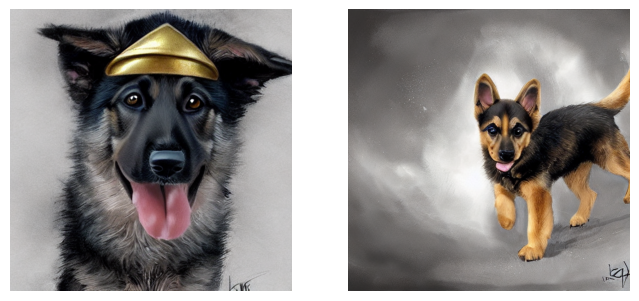

Tiempo transcurrido: 331.58 segundos
Tiempo transcurrido: 5.53 minutos


In [15]:
prompt = 'a cute magical flying german shepherd puppy wearing a superman cape, \
fantasy art drawn by disney concept artists, golden colour, high quality, \
highly detailed, elegant, sharp focus, concept art, character concepts, \
digital painting, mystery, adventure'

start_time = time.time()

generate_image_grid(text_prompt=prompt, n_images=2, rows=1, cols=2, output_size=(512, 512))

end_time = time.time()
elapsed_timeGPU = end_time - start_time
print(f"Tiempo transcurrido: {round(elapsed_timeGPU, 2)} segundos")
print(f"Tiempo transcurrido: {round(elapsed_timeGPU / 60, 2)} minutos")


## Stable Diffusion en CPU

In [7]:
# Creating the pipeline for CPU
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")


Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]


100%|██████████| 50/50 [22:15<00:00, 26.72s/it]


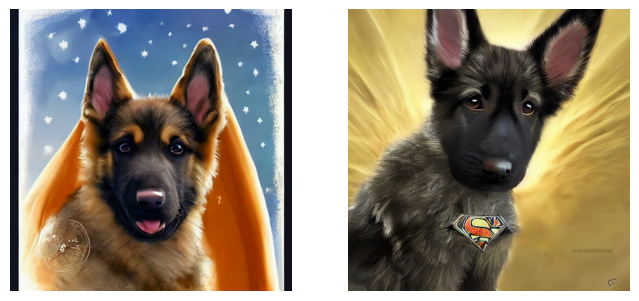

Tiempo transcurrido: 1365.03 segundos
Tiempo transcurrido: 22.75 minutos


In [8]:
prompt = 'a cute magical flying german shepherd puppy wearing a superman cape, \
fantasy art drawn by disney concept artists, golden colour, high quality, \
highly detailed, elegant, sharp focus, concept art, character concepts, \
digital painting, mystery, adventure'

start_time = time.time()

generate_image_grid(text_prompt=prompt, n_images = 2,  rows=1, cols = 2, output_size=(512, 512))

end_time = time.time()
elapsed_timeCPU = end_time - start_time
print(f"Tiempo transcurrido: {round(elapsed_timeCPU, 2)} segundos")
print(f"Tiempo transcurrido: {round(elapsed_timeCPU / 60, 2)} minutos")

## Comparemos la GPU con la CPU

In [9]:
speedup_factor = elapsed_timeCPU / elapsed_timeGPU
print(f"La ejecución en GPU fue aproximadamente {speedup_factor:.2f} veces más rápida que en CPU.")


La ejecución en GPU fue aproximadamente 4.14 veces más rápida que en CPU.
